In [1]:
# Cloning the FSOD repository from "Frustratingly Simple Object Detection" paper and navigating to repo
!git clone https://github.com/idriswardere/fsod-valorant.git
%cd fsod-valorant
%ls

Cloning into 'fsod-valorant'...
remote: Enumerating objects: 833, done.
remote: Counting objects: 100% (381/381), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 833 (delta 280), reused 273 (delta 273), pack-reused 452
Receiving objects: 100% (833/833), 521.43 KiB | 4.97 MiB/s, done.
Resolving deltas: 100% (481/481), done.
/content/fsod-valorant
configs/   demo/  fsdet/    pyproject.toml  requirements-dev.txt  tools/
datasets/  docs/  LICENSE*  README.md*      requirements.txt*


In [2]:
# Installing Detectron2 and other requirements
!pip install git+https://github.com/facebookresearch/detectron2
!python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-req-build-q0u9ekmo
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-q0u9ekmo
  Resolved https://github.com/facebookresearch/detectron2 to commit d779ea63faa54fe42b9b4c280365eaafccb280d6
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import critical libraries
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

# Import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [4]:
# Running pre-trained Faster-RCNN-based model on person.jpg
# !python3 -m demo.demo --confidence-threshold 0.74 --config-file configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml --input breach.png --opts MODEL.DEVICE cpu MODEL.WEIGHTS fsdet://voc/split1/base_model/model_final.pth

In [5]:
# Downloading our dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GMQT8YWluuOVof5f1Jnk")
project = rf.workspace("fsodvalorant").project("fsod-valorant")
dataset = project.version(2).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=997636930e2ab18219fa185415df1a7cf4c6aea83d150708b0cee38d1eb15efd
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to FSOD-Valorant-2 in coco:: 100%|██████████| 204/204 [00:00<00:00, 1208.99it/s]


In [ ]:
# Show a random image from the custom Valorant dataset
img_path = "FSOD-Valorant-2/train/Valorant-Screenshot-2023-03-27-22-22-15-80_png.rf.94bb19bd9c85c61e109488d5a7b6e8fa.jpg"

im = cv2.imread(img_path)
cv2_imshow(im)

In [ ]:
# Setting up a base model predictor and making prediction

config_file_name = "configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml"
checkpoint_url_name = "http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth"

# Making config
cfg = get_cfg()
cfg.merge_from_file(config_file_name)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE = 'cpu'
# Feel free to find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = checkpoint_url_name
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

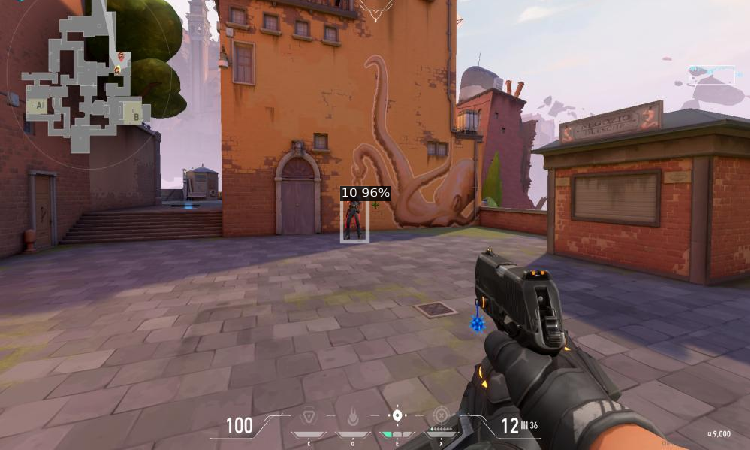

In [9]:
# We can use `Visualizer` to draw the predictions from the base model on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Registering custom dataset

from detectron2.data.datasets import register_coco_instances

valorant_dataset = 'fsod-valorant-2'

register_coco_instances(valorant_dataset, {}, "FSOD-Valorant-2/train/_annotations.coco.json", "FSOD-Valorant-2/train")

In [ ]:
# Creating dataloader from custom dataset

from detectron2.data import build_detection_train_loader
from detectron2.data import DatasetMapper

batch_size = 1

train_dl = build_detection_train_loader(DatasetCatalog.get(valorant_dataset), mapper=DatasetMapper(cfg, is_train=True), total_batch_size=batch_size)

Instances(num_instances=1, image_height=544, image_width=907, fields=[gt_boxes: Boxes(tensor([[413.5920, 124.2133, 444.8835, 203.5467]])), gt_classes: tensor([1])])


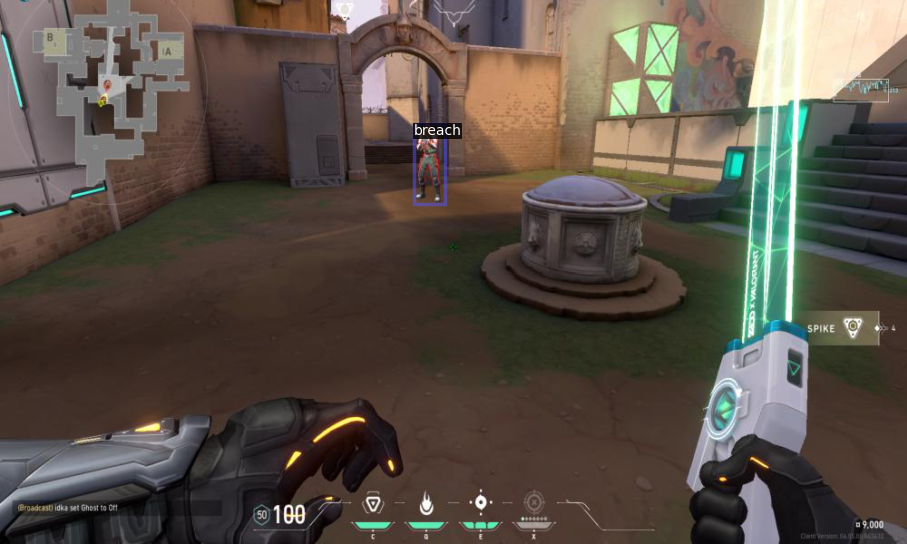

In [12]:
# Making sure the custom dataset is correctly loaded

skip_first = 3 # skip the first k images in batch to visualize k+1th image

for i, x in enumerate(train_dl):
  if i in range(skip_first): continue
  print(x[0]['instances'])
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  metadata = MetadataCatalog.get(valorant_dataset)
  v = Visualizer(img, metadata) # Defining visualizer with image
  target_fields = x[0]["instances"].get_fields()
  labels = [metadata.thing_classes[i] for i in target_fields["gt_classes"]] # Mapping class indices to class names for labels
  vis = v.overlay_instances(  # Creating VisImage made from visualizer with boxes
      labels=labels,
      boxes=target_fields.get("gt_boxes", None),
      )
  cv2_imshow(vis.get_image()[:, :, ::-1])
  break

In [14]:
# Build model from cfg and save the .pth file using a Checkpointer

from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

model = build_model(cfg)

DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)  # load a file, usually from cfg.MODEL.WEIGHTS
checkpointer = DetectionCheckpointer(model, save_dir="./")
checkpointer.save("base_detection_model")
%ls

[04/01 03:18:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth ...
base_detection_model.pth  fsdet/            README.md*
configs/                  FSOD-Valorant-2/  requirements-dev.txt
datasets/                 last_checkpoint   requirements.txt*
demo/                     LICENSE*          tools/
docs/                     pyproject.toml


In [ ]:
# Training baseline model

# Randomly initialize final layer weights
!python3 -m tools.ckpt_surgery \
        --src1 ./base_detection_model.pth \
        --method randinit \
        --save-dir ./

# Do novel/base dataset training
!python3 -m tools.train_net --num-gpus 1 \
        --config-file configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_ft_all1_1shot.yaml \
        --opts MODEL.WEIGHTS ./model_reset_surgery.pth

In [ ]:
# Evaluate the model 

!python3 -m tools.test_net --num-gpus 8 \
        --config-file configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_ft_all1_1shot.yaml \
        --eval-only